* Colab jupyter notebook끼리 import하기 위한 선언

In [6]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1
'Ch01. 헬로 파이썬ipynb.ipynb'	'Chap02. 퍼셉트론.ipynb'


In [40]:
import numpy as np
import matplotlib.pyplot as plt

### 퍼셉트론이란?
* 다수의 신호를 입력으로 받아 하나의 신호를 출력하는 것
* 입력 신로는 뉴런에 보내질 때 각각 고유한 가중치가 곱해짐


In [10]:
def AND(x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7
  tmp = x1*w1 + x2*w2
  if tmp <= theta:
    return 0
  else:
    return 1

In [12]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


* theta를 -b로 치환해서
* x1*w1 + x2*w*2 + b <= 0 꼴로 만들어줌

In [15]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b= -0.7

In [16]:
w*x

array([0. , 0.5])

In [17]:
np.sum(w*x)

0.5

In [18]:
np.sum(w*x) + b

-0.19999999999999996

* w1과 w2는 입력신호가 결과에 주는 영향력(중요도),
* 편향은 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력)하느냐 조정하는 매개변수

In [63]:
def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [64]:
print(AND(0, 0))
print(AND(0, 1))
print(AND(1, 0))
print(AND(1, 1))

0
0
0
1


In [72]:
def NAND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([-0.5, -0.5])
  b = 0.7

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [73]:
print(NAND(0, 0))
print(NAND(0, 1))
print(NAND(1, 0))
print(NAND(1, 1))

1
1
1
0


In [74]:
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b =-0.2

  tmp = np.sum(w*x) + b
  if tmp <= 0:
    return 0
  else:
    return 1

In [75]:
print(OR(0, 0))
print(OR(0, 1))
print(OR(1, 0))
print(OR(1, 1))

0
1
1
1


* XOR 게이트는 선형으로 0과 1을 나눌 수 없음

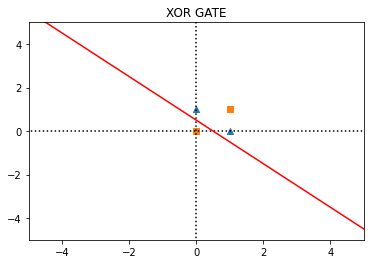

In [76]:
x_true = [0, 1]
y_true = [1, 0]

x_false = [0, 1]
y_false = [0, 1]

x1 = [-6, 6]
y1 = [-1*x_line + 0.5 for x_line in x1]


plt.plot([0,0],[-6,6], 'k:')
plt.plot([-6,6],[0,0],'k:')

plt.scatter(x_true, y_true, marker = '^')
plt.scatter(x_false, y_false,marker = 's')

plt.plot(x1, y1, 'r')
plt.title("XOR GATE")
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.show()

* 그래서 비선형인 곡선을 통해 0과 1을 나눠야함
* AND + NAND + OR을 이용해서 XOR을 구할 수 있음 (다층 퍼셉트론)


In [77]:
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y = AND(s1, s2)
  return y

In [78]:
print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


* 비선형성을 이용해 임의의 함수를 표현할 수 있다
* ex) sigmoid, softmax, etc